In [1]:
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
import numpy as np
from pandasql import sqldf

In [2]:
#helper functions 
def save_file(pathname, filename, df):
    df.to_csv(f'{pathname}/{filename}.csv', index = False)
    return

In [3]:
df = pd.read_csv('/Users/emmagruben/Downloads/Datathon 2024/datathon_2024_dataset.csv')
df['game_date'] = pd.to_datetime(df['game_date'], format = "%Y%m%d") 

In [4]:
df['game_date'] = pd.to_datetime(df['game_date'], format = "%Y%m%d") 
df.loc[df['home_team']=='FLO','home_team'] = 'MIA'
df.loc[df['away_team'] == 'FLO','away_team'] = 'MIA'

In [5]:
df['home_win']= [1 if x>y else 0 for x,y in zip(df['home_score'],df['away_score'])]

In [111]:
teams_list = sorted(df['home_team'].unique())

In [79]:
len(teams_list)

31

In [112]:
total_games=np.zeros(30)
total_home_win = np.zeros(30)
for i in range(0,30):
    total_games[i] = len(df[df['home_team'] == teams_list[i]]) + len([df['away_team'] == teams_list[i]])
    total_home_win[i] = df[(df['home_team'] == teams_list[i])&(df['home_win'] ==1)]['home_win'].sum()
    
total_games
total_home_win
home_win_perc = total_home_win/total_games

In [113]:
data = {'team' : teams_list,
        'total_games': total_games,
        'total_home_win': total_home_win,
        'home_win_perc': home_win_perc}
wl = pd.DataFrame(data)

In [114]:
wl

,team,total_games,total_home_win,home_win_perc
0,ANA,1897.0,1047.0,0.551924
1,ARI,1894.0,982.0,0.518479
2,ATL,1893.0,1087.0,0.574221
3,BAL,1892.0,922.0,0.487315
4,BOS,1895.0,1085.0,0.572559
5,CHA,1894.0,1002.0,0.529039
6,CHN,1898.0,1010.0,0.532139
7,CIN,1894.0,943.0,0.497888
8,CLE,1891.0,1034.0,0.546801
9,COL,1895.0,1019.0,0.537731


In [289]:
dist = pd.read_csv('/Users/emmagruben/Downloads/Datathon 2024/datathon2024_data_w_dist.csv')
dist.loc[dist['home_team']=='MON','home_team'] = 'WAS'
dist.loc[dist['home_team'] == 'MON','away_team'] = 'WAS'
dist['away_win']= [1 if y>x else 0 for x,y in zip(dist['home_score'],dist['away_score'])]

In [109]:
dist.columns

Index(['index', 'game_date', 'home_team', 'away_team', 'is_day_game',
       'home_score', 'away_score', 'venue', 'venue_name', 'city', 'state',
       'away_pa', 'away_1b', 'away_2b', 'away_3b', 'away_hr', 'away_fo',
       'away_so', 'away_bb', 'away_hbp', 'home_pa', 'home_1b', 'home_2b',
       'home_3b', 'home_hr', 'home_fo', 'home_so', 'home_bb', 'home_hbp',
       'lat', 'lng', 'time_zone', 'year', 'home_win', 'home_last_time_zone',
       'away_last_time_zone', 'home_time_between_games',
       'away_time_between_games', 'home_time_since_last_series',
       'away_time_since_last_series', 'home_distance_travelled_game',
       'away_distance_travelled_game', 'home_distance_travelled_series',
       'away_distance_travelled_series'],
      dtype='object')

In [290]:
def teams_dist(team):
    sub = dist[(dist['home_team']== team) | (dist['away_team']== team)]
    sub['home_game'] = np.where(sub['home_team'] == team, 1, 0)
    sub['score'] = np.where(sub['home_game'] == 1, sub['home_score'], sub['away_score'])
    sub['last_time_zone'] = np.where(sub['home_game'] == 1, sub['home_last_time_zone'], sub['away_last_time_zone'])
    sub['dist_traveled'] = pd.to_numeric(np.where(sub['home_game'] == 1, sub['home_distance_travelled_game'], sub['away_distance_travelled_game']))
    sub['time_between_games'] = np.where(sub['home_game'] == 1, sub['home_time_between_games'], sub['away_time_between_games'])
    sub['time_zone_team'] = np.where(sub['home_game'] == 1, sub['home_last_time_zone'], sub['away_last_time_zone'])
    sub['win'] = np.where(sub['home_game'] == 1, sub['home_win'],sub['away_win'] )
    sub['team'] = team
    sub['time_zone_dif'] = abs(sub['time_zone_team']-sub['time_zone'])
    
    return sub
    

In [104]:
team_list

['ATL',
 'AZ',
 'BAL',
 'BOS',
 'CHC',
 'CIN',
 'CLE',
 'COL',
 'CWS',
 'DET',
 'HOU',
 'KC',
 'LAA',
 'LAD',
 'MIA',
 'MIL',
 'MIN',
 'MON',
 'NYM',
 'NYY',
 'OAK',
 'PHI',
 'PIT',
 'SD',
 'SEA',
 'SF',
 'STL',
 'TB',
 'TEX',
 'TOR',
 'WAS']

In [291]:
team_list = sorted(dist['home_team'].unique())
df_list=[]
for team in team_list:
    df_list.append(teams_dist(team))
    
res = pd.concat(df_list)
res

/var/folders/54/lw0xxnyj2qsdtxv3kqfz9v980000gn/T/ipykernel_85207/3793650981.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/54/lw0xxnyj2qsdtxv3kqfz9v980000gn/T/ipykernel_85207/3793650981.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/54/lw0xxnyj2qsdtxv3kqfz9v980000gn/T/ipykernel_85207/3793650981.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,index,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,city,...,away_win,home_game,score,last_time_zone,dist_traveled,time_between_games,time_zone_team,win,team,time_zone_dif
6,2435,2001-04-02,CIN,ATL,True,4,10,CIN08,Cinergy Field,Cincinnati,...,1,0,10,-5.0,595.475478,183.0,-5.0,1,ATL,0.0
15,2444,2001-04-03,ATL,NYM,True,4,6,ATL02,Turner Field,Atlanta,...,1,1,4,-5.0,595.475478,1.0,-5.0,0,ATL,0.0
26,2455,2001-04-04,ATL,NYM,False,3,2,ATL02,Turner Field,Atlanta,...,0,1,3,-5.0,0.000000,1.0,-5.0,1,ATL,0.0
39,2468,2001-04-05,ATL,NYM,False,1,7,ATL02,Turner Field,Atlanta,...,1,1,1,-5.0,0.000000,1.0,-5.0,0,ATL,0.0
55,2484,2001-04-06,MIA,ATL,False,5,7,MIA01,Sun Life Stadium,Miami,...,1,0,7,-5.0,975.852334,1.0,-5.0,1,ATL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54266,56695,2023-09-26,BAL,WAS,False,1,0,BAL12,Oriole Park at Camden Yards,Baltimore,...,0,0,0,-5.0,56.202713,2.0,-5.0,0,WAS,0.0
54282,56711,2023-09-27,BAL,WAS,False,5,1,BAL12,Oriole Park at Camden Yards,Baltimore,...,0,0,1,-5.0,0.000000,1.0,-5.0,0,WAS,0.0
54302,56731,2023-09-29,ATL,WAS,False,6,10,ATL03,Truist Park,Atlanta,...,1,0,10,-5.0,928.030051,2.0,-5.0,1,WAS,0.0
54316,56745,2023-09-30,ATL,WAS,False,5,3,ATL03,Truist Park,Atlanta,...,0,0,3,-5.0,0.000000,1.0,-5.0,0,WAS,0.0


In [292]:
mascots_div = pd.read_csv("/Users/emmagruben/Downloads/Datathon 2024/teams_mascots_div - Sheet1.csv")

In [237]:
win_sum_sort = win_sum.sort_values(by='win_totals', ascending=False)
win_sum_sort

,mascot,year,division,win_totals,COUNT(new.mascot),total_games
29,Yankees,2001,American League East,2105,3623,3623
9,Dodgers,2001,National League West,2055,3624,3624
6,Cardinals,2001,National League Central,2001,3621,3621
22,Red Sox,2001,American League East,1979,3623,3623
4,Braves,2001,National League East,1968,3621,3621
0,Angels,2001,American League West,1889,3624,3624
10,Giants,2001,National League West,1875,3622,3622
2,Athletics,2001,American League West,1870,3623,3623
1,Astros,2001,American League West,1869,3624,3624
11,Guardians,2001,American League Central,1864,3622,3622


In [235]:
query = "SELECT new.mascot,new.year,new.division, SUM(new.win) as win_totals, COUNT(new.mascot), COUNT(new.mascot) as total_games FROM new GROUP BY new.mascot"
win_sum =sqldf(query)
win_sum

,mascot,year,division,win_totals,COUNT(new.mascot),total_games
0,Angels,2001,American League West,1889,3624,3624
1,Astros,2001,American League West,1869,3624,3624
2,Athletics,2001,American League West,1870,3623,3623
3,Blue Jays,2001,American League East,1820,3623,3623
4,Braves,2001,National League East,1968,3621,3621
5,Brewers,2001,National League Central,1794,3624,3624
6,Cardinals,2001,National League Central,2001,3621,3621
7,Cubs,2001,National League Central,1821,3623,3623
8,Diamondbacks,2001,National League West,1748,3624,3624
9,Dodgers,2001,National League West,2055,3624,3624


In [293]:
query = "SELECT * FROM mascots_div, res WHERE res.team = mascots_div.team_abr"
new = sqldf(query)

In [218]:
query = "SELECT new.mascot,new.year,new.division, SUM(new.win) as win_totals, COUNT(new.mascot) as total_games FROM new GROUP BY new.mascot, new.year"
win_sum =sqldf(query)

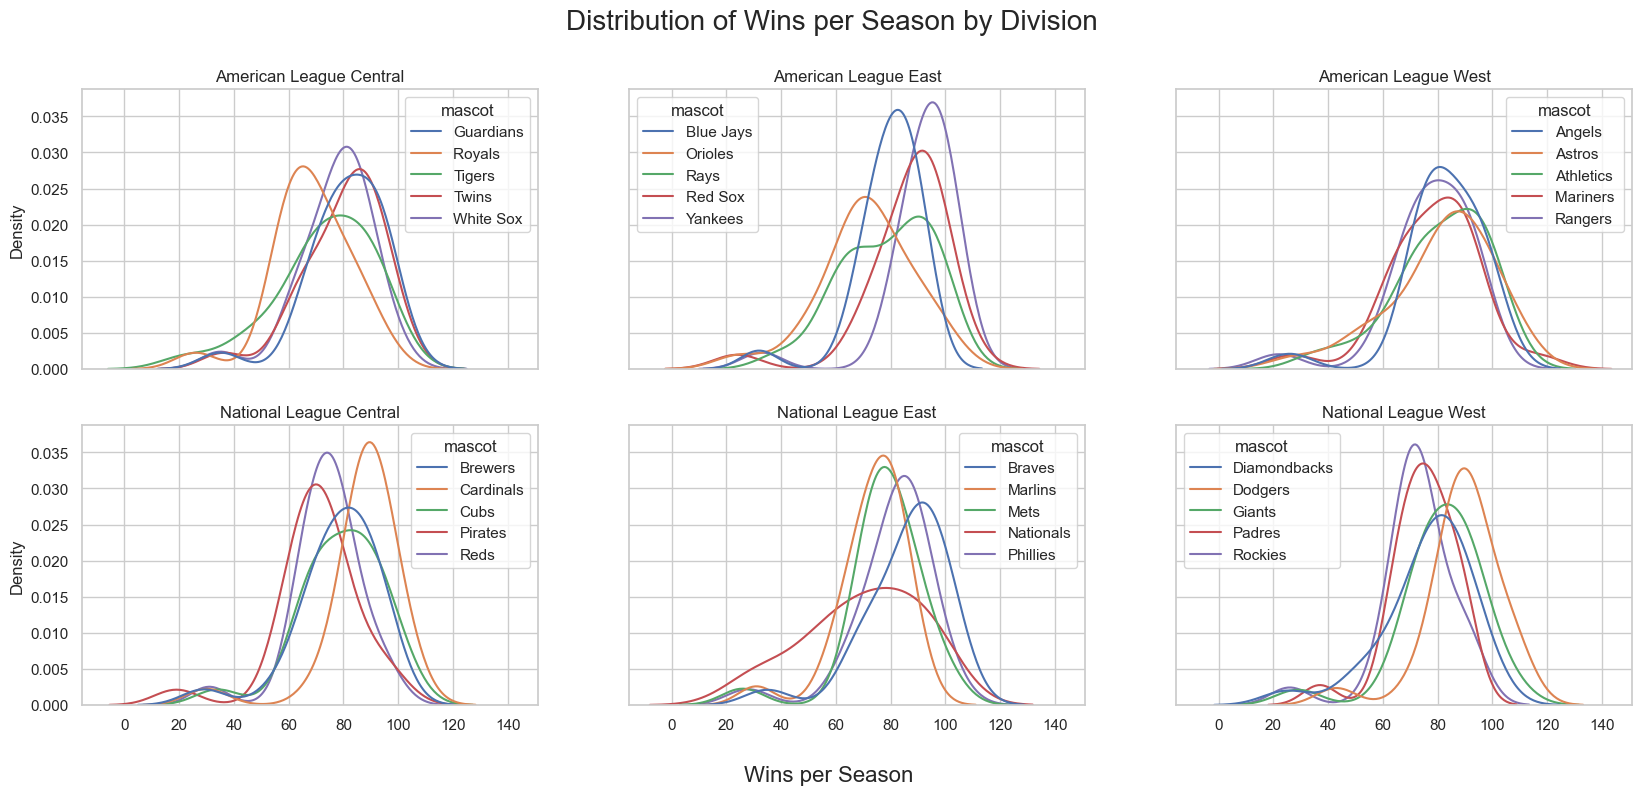

In [219]:
plt.rcParams["figure.figsize"]=20,8
# set seaborn whitegrid theme
sns.set(style="whitegrid")
fig,axes = plt.subplots(2,3,sharey=True, sharex=True)
axes = axes.flatten()
 
a=sns.kdeplot(data=win_sum[win_sum['division']=="American League Central"], x="win_totals",
            hue ="mascot", common_norm=False,  ax = axes[0])
a.title.set_text("American League Central")
a.set(xlabel = None)
b=sns.kdeplot(data=win_sum[win_sum['division']=="American League East"], x="win_totals",
            hue ="mascot",  common_norm=False,  ax = axes[1])
b.title.set_text("American League East")
b.set(xlabel = None)
c=sns.kdeplot(data=win_sum[win_sum['division']=="American League West"], x="win_totals",
            hue ="mascot",  common_norm=False,  ax = axes[2])
c.title.set_text("American League West")
c.set(xlabel = None)
d=sns.kdeplot(data=win_sum[win_sum['division']=="National League Central"], x="win_totals",
            hue ="mascot", common_norm=False, ax = axes[3])
d.title.set_text("National League Central")
d.set(xlabel = None)
e=sns.kdeplot(data=win_sum[win_sum['division']=="National League East"], x="win_totals",
            hue ="mascot",  common_norm=False, ax = axes[4])
e.title.set_text("National League East")
e.set(xlabel = None)
f=sns.kdeplot(data=win_sum[win_sum['division']=="National League West"], x="win_totals",
            hue ="mascot",common_norm=False, ax = axes[5])
f.title.set_text("National League West")
f.set(xlabel = None)
fig.supxlabel('Wins per Season ', fontsize=16)
fig.suptitle('Distribution of Wins per Season by Division', fontsize=20)
plt.show()

In [319]:
temp.rename(columns = {"mascot":"Team"}

Index(['team_abr', 'division', 'mascot', 'index', 'game_date', 'home_team',
       'away_team', 'is_day_game', 'home_score', 'away_score', 'venue',
       'venue_name', 'city', 'state', 'away_pa', 'away_1b', 'away_2b',
       'away_3b', 'away_hr', 'away_fo', 'away_so', 'away_bb', 'away_hbp',
       'home_pa', 'home_1b', 'home_2b', 'home_3b', 'home_hr', 'home_fo',
       'home_so', 'home_bb', 'home_hbp', 'lat', 'lng', 'time_zone', 'year',
       'home_win', 'home_last_time_zone', 'away_last_time_zone',
       'home_time_between_games', 'away_time_between_games',
       'home_time_since_last_series', 'away_time_since_last_series',
       'home_distance_travelled_game', 'away_distance_travelled_game',
       'home_distance_travelled_series', 'away_distance_travelled_series',
       'away_win', 'home_game', 'score', 'last_time_zone', 'dist_traveled',
       'time_between_games', 'time_zone_team', 'win', 'team', 'time_zone_dif'],
      dtype='object')

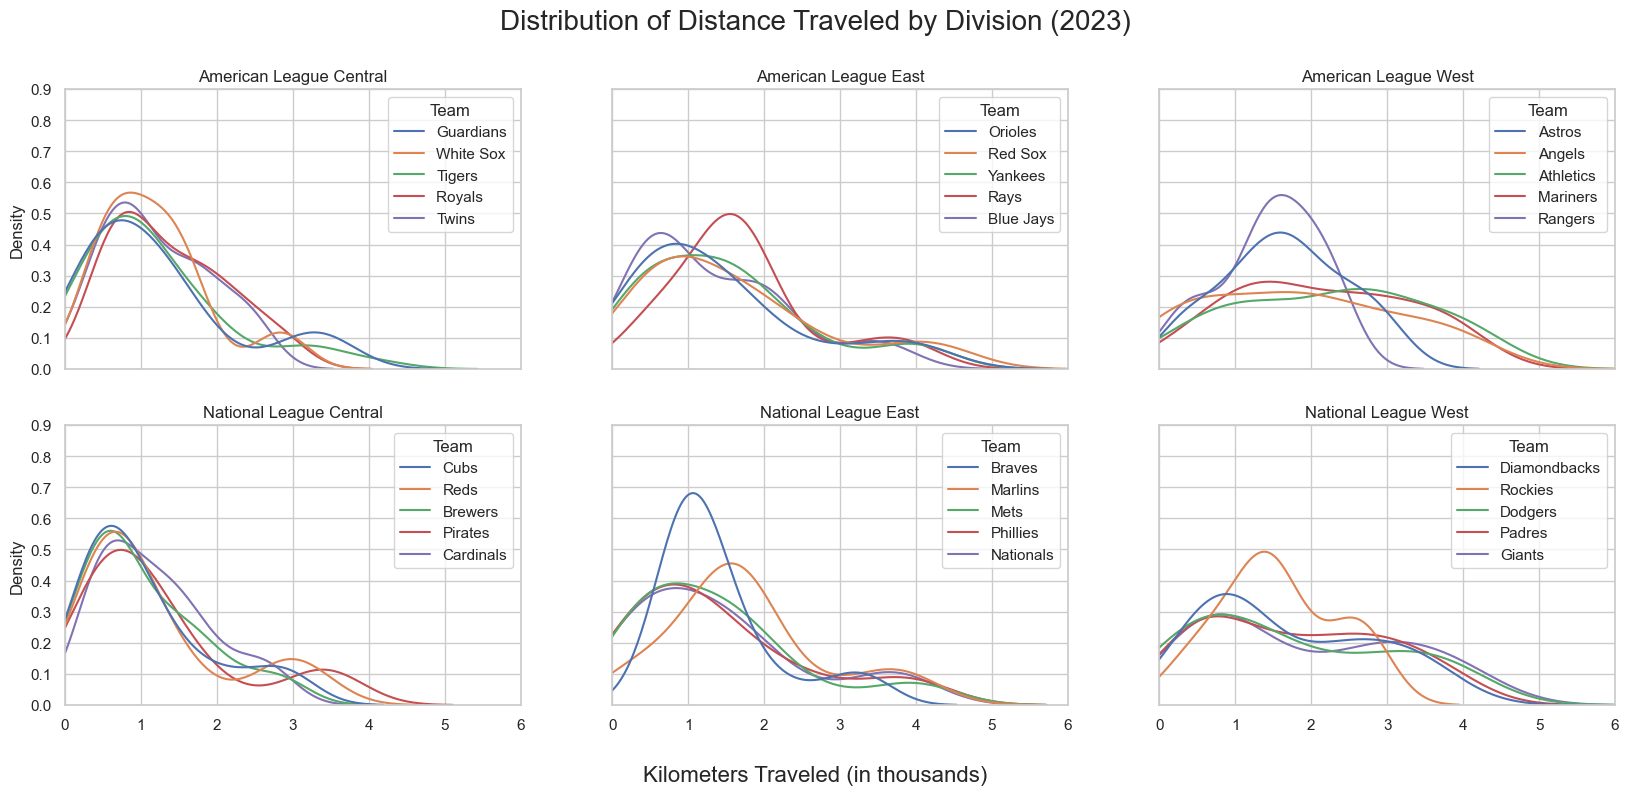

In [322]:
temp = new.copy()
temp =temp.rename(columns = {"mascot":"Team"})
temp = temp[temp['dist_traveled'] != 0]
temp['dist_traveled'] = temp['dist_traveled']/1000
temp=temp[temp['year']== 2023]
plt.rcParams["figure.figsize"]=20,8
# set seaborn whitegrid theme
sns.set(style="whitegrid")
fig,axes = plt.subplots(2,3,sharey=True, sharex=True)
axes = axes.flatten()
# Without transparency
pal = {"Guardians":'#d40a0a', "White Sox": "#322f2f", "Tigers":"#043369", "Royals ":"#4169e1",
       "Twins":"#4169e1"}
 
a=sns.kdeplot(data=temp[temp['division']=="American League Central"], x="dist_traveled",
            hue ="Team", common_norm=False,  ax = axes[0])
a.title.set_text("American League Central")
a.set(xlabel = None)
b=sns.kdeplot(data=temp[temp['division']=="American League East"], x="dist_traveled",
            hue ="Team",  common_norm=False,  ax = axes[1])
b.title.set_text("American League East")
b.set(xlabel = None)
c=sns.kdeplot(data=temp[temp['division']=="American League West"], x="dist_traveled",
            hue ="Team",  common_norm=False,  ax = axes[2])
c.title.set_text("American League West")
c.set(xlabel = None)
d=sns.kdeplot(data=temp[temp['division']=="National League Central"], x="dist_traveled",
            hue ="Team", common_norm=False, ax = axes[3])
d.title.set_text("National League Central")
d.set(xlabel = None)
e=sns.kdeplot(data=temp[temp['division']=="National League East"], x="dist_traveled",
            hue ="Team",  common_norm=False, ax = axes[4])
e.title.set_text("National League East")
e.set(xlabel = None)
f=sns.kdeplot(data=temp[temp['division']=="National League West"], x="dist_traveled",
            hue ="Team",common_norm=False, ax = axes[5])
f.title.set_text("National League West")
f.set(xlabel = None)

for ax in axes:
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 0.9)

fig.supxlabel('Kilometers Traveled (in thousands)', fontsize=16)
fig.suptitle('Distribution of Distance Traveled by Division (2023)', fontsize=20)
plt.show()

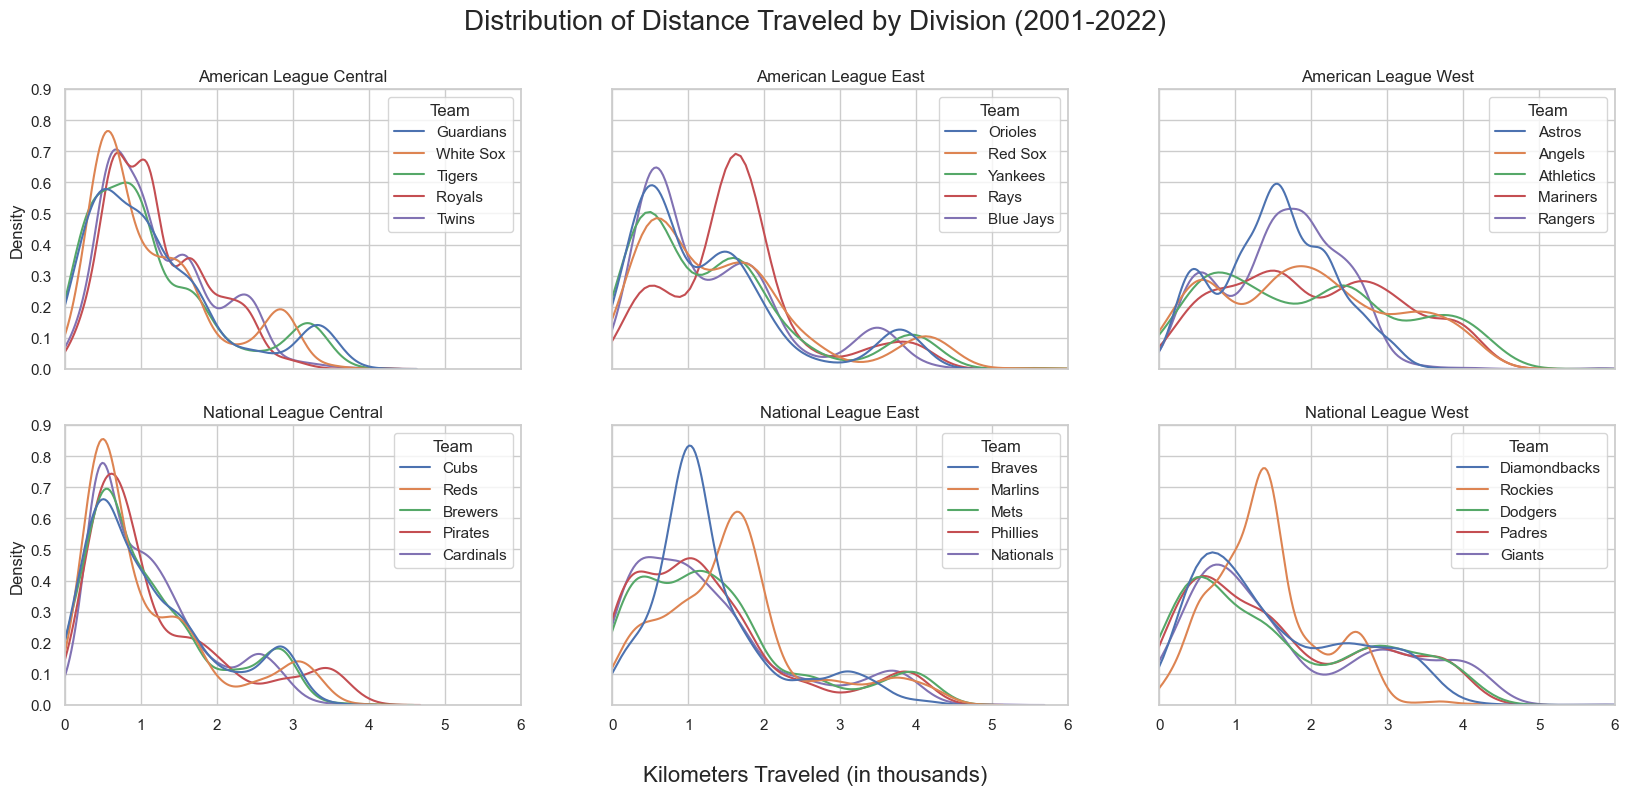

In [323]:
temp2= new.copy()
temp2=temp2.rename(columns = {"mascot":"Team"})
temp2 = temp2[temp2['dist_traveled'] != 0]
temp2['dist_traveled'] = temp2['dist_traveled']/1000
temp2=temp2[temp2['year'] < 2023]
plt.rcParams["figure.figsize"]=20,8
# set seaborn whitegrid theme
sns.set(style="whitegrid")
fig,axes = plt.subplots(2,3,sharey=True, sharex=True)
axes = axes.flatten()
# Without transparency
pal = {"Guardians":'#d40a0a', "White Sox": "#322f2f", "Tigers":"#043369", "Royals ":"#4169e1",
       "Twins":"#4169e1"}
 
a=sns.kdeplot(data=temp2[temp2['division']=="American League Central"], x="dist_traveled",
            hue ="Team", common_norm=False,  ax = axes[0])
a.title.set_text("American League Central")
a.set(xlabel = None)
b=sns.kdeplot(data=temp2[temp2['division']=="American League East"], x="dist_traveled",
            hue ="Team",  common_norm=False,  ax = axes[1])
b.title.set_text("American League East")
b.set(xlabel = None)
c=sns.kdeplot(data=temp2[temp2['division']=="American League West"], x="dist_traveled",
            hue ="Team",  common_norm=False,  ax = axes[2])
c.title.set_text("American League West")
c.set(xlabel = None)
d=sns.kdeplot(data=temp2[temp2['division']=="National League Central"], x="dist_traveled",
            hue ="Team", common_norm=False, ax = axes[3])
d.title.set_text("National League Central")
d.set(xlabel = None)
e=sns.kdeplot(data=temp2[temp2['division']=="National League East"], x="dist_traveled",
            hue ="Team",  common_norm=False, ax = axes[4])
e.title.set_text("National League East")
e.set(xlabel = None)
f=sns.kdeplot(data=temp2[temp2['division']=="National League West"], x="dist_traveled",
            hue ="Team",common_norm=False, ax = axes[5])
f.title.set_text("National League West")
f.set(xlabel = None)
for ax in axes:
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 0.9)
fig.supxlabel('Kilometers Traveled (in thousands)', fontsize=16)
fig.suptitle('Distribution of Distance Traveled by Division (2001-2022)', fontsize=20)
plt.show()

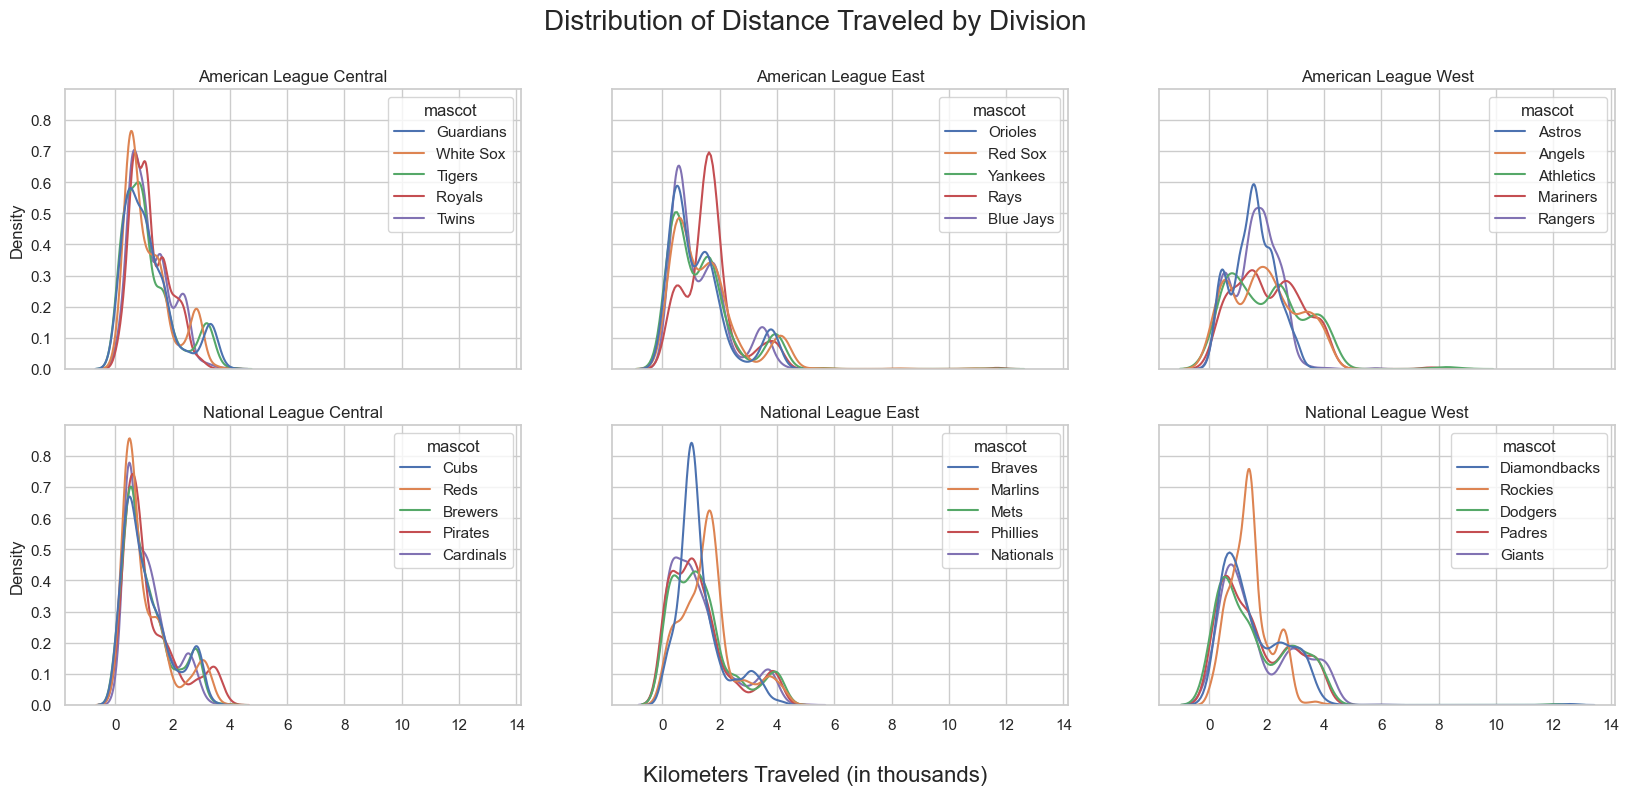

In [202]:
new = new[new['dist_traveled'] != 0]
new['dist_traveled'] = new['dist_traveled']/1000
plt.rcParams["figure.figsize"]=20,8
# set seaborn whitegrid theme
sns.set(style="whitegrid")
fig,axes = plt.subplots(2,3,sharey=True, sharex=True)
axes = axes.flatten()
# Without transparency
pal = {"Guardians":'#d40a0a', "White Sox": "#322f2f", "Tigers":"#043369", "Royals ":"#4169e1",
       "Twins":"#4169e1"}
 
a=sns.kdeplot(data=new[new['division']=="American League Central"], x="dist_traveled",
            hue ="mascot", common_norm=False,  ax = axes[0])
a.title.set_text("American League Central")
a.set(xlabel = None)
b=sns.kdeplot(data=new[new['division']=="American League East"], x="dist_traveled",
            hue ="mascot",  common_norm=False,  ax = axes[1])
b.title.set_text("American League East")
b.set(xlabel = None)
c=sns.kdeplot(data=new[new['division']=="American League West"], x="dist_traveled",
            hue ="mascot",  common_norm=False,  ax = axes[2])
c.title.set_text("American League West")
c.set(xlabel = None)
d=sns.kdeplot(data=new[new['division']=="National League Central"], x="dist_traveled",
            hue ="mascot", common_norm=False, ax = axes[3])
d.title.set_text("National League Central")
d.set(xlabel = None)
e=sns.kdeplot(data=new[new['division']=="National League East"], x="dist_traveled",
            hue ="mascot",  common_norm=False, ax = axes[4])
e.title.set_text("National League East")
e.set(xlabel = None)
f=sns.kdeplot(data=new[new['division']=="National League West"], x="dist_traveled",
            hue ="mascot",common_norm=False, ax = axes[5])
f.title.set_text("National League West")
f.set(xlabel = None)
fig.supxlabel('Kilometers Traveled (in thousands)', fontsize=16)
fig.suptitle('Distribution of Distance Traveled by Division', fontsize=20)
plt.show()

In [178]:
query = "SELECT new.mascot, new.division,new.year, SUM(new.time_zone_dif) as yearly_diff_totals FROM new GROUP BY new.year, new.mascot"
times = sqldf(query)

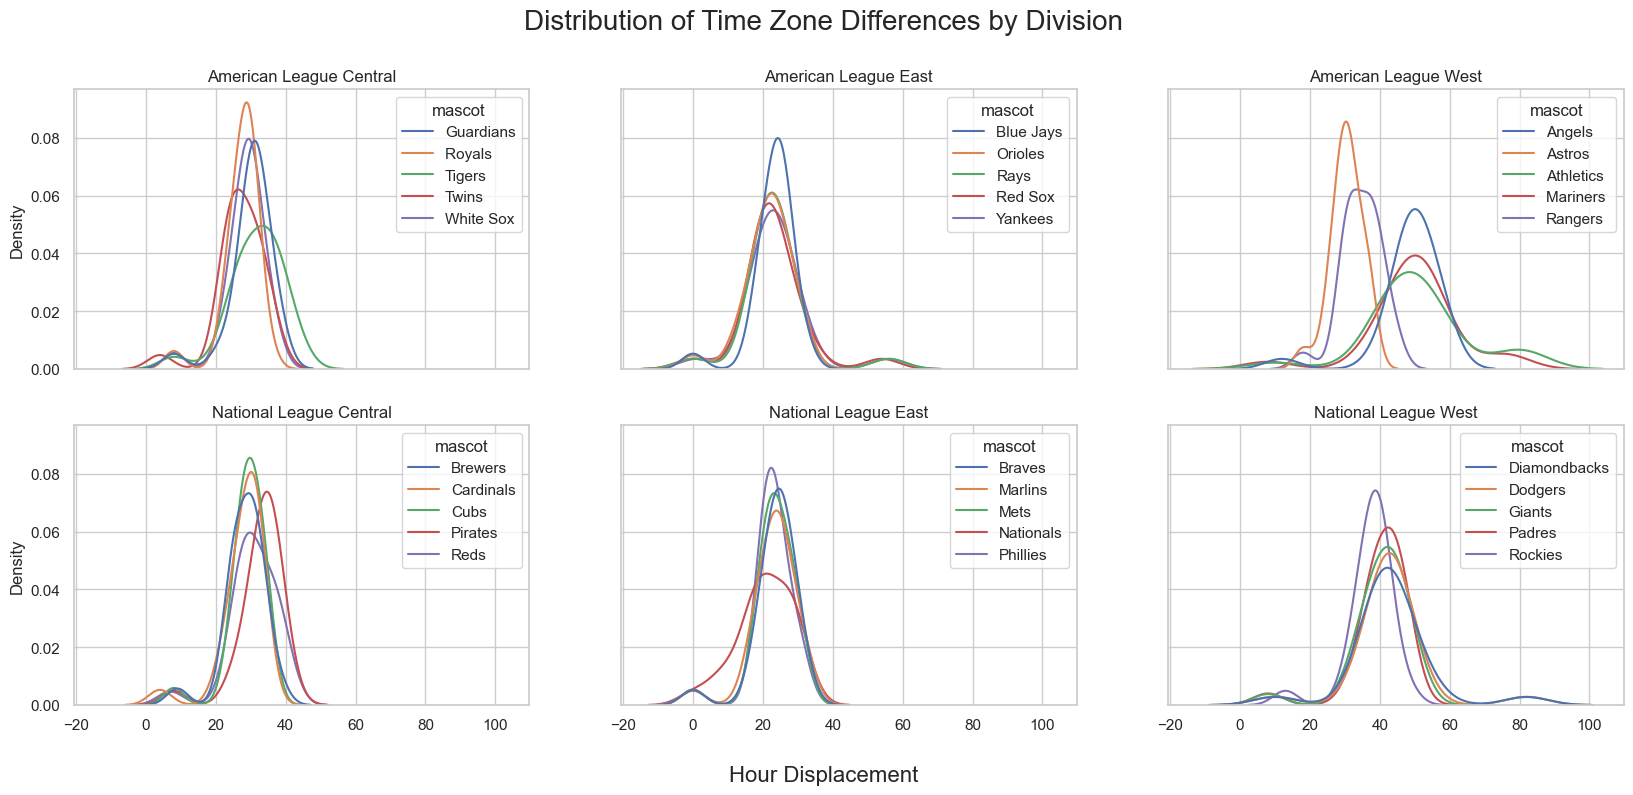

In [180]:
plt.rcParams["figure.figsize"]=20,8
# set seaborn whitegrid theme
sns.set(style="whitegrid")
fig,axes = plt.subplots(2,3,sharey=True, sharex=True)
axes = axes.flatten()
# Without transparency
pal = {"Guardians":'#d40a0a', "White Sox": "#322f2f", "Tigers":"#043369", "Royals ":"#4169e1",
       "Twins":"#4169e1"}
 
a=sns.kdeplot(data=times[times['division']=="American League Central"], x="yearly_diff_totals",
            hue ="mascot", common_norm=False,  ax = axes[0])
a.title.set_text("American League Central")
a.set(xlabel = None)
b=sns.kdeplot(data=times[times['division']=="American League East"], x="yearly_diff_totals",
            hue ="mascot",  common_norm=False,  ax = axes[1])
b.title.set_text("American League East")
b.set(xlabel = None)
c=sns.kdeplot(data=times[times['division']=="American League West"], x="yearly_diff_totals",
            hue ="mascot",  common_norm=False,  ax = axes[2])
c.title.set_text("American League West")
c.set(xlabel = None)
d=sns.kdeplot(data=times[times['division']=="National League Central"], x="yearly_diff_totals",
            hue ="mascot", common_norm=False, ax = axes[3])
d.title.set_text("National League Central")
d.set(xlabel = None)
e=sns.kdeplot(data=times[times['division']=="National League East"], x="yearly_diff_totals",
            hue ="mascot",  common_norm=False, ax = axes[4])
e.title.set_text("National League East")
e.set(xlabel = None)
f=sns.kdeplot(data=times[times['division']=="National League West"], x="yearly_diff_totals",
            hue ="mascot",common_norm=False, ax = axes[5])
f.title.set_text("National League West")
f.set(xlabel = None)
fig.supxlabel('Hour Displacement', fontsize=16)
fig.suptitle('Distribution of Time Zone Differences by Division', fontsize=20)
plt.show()

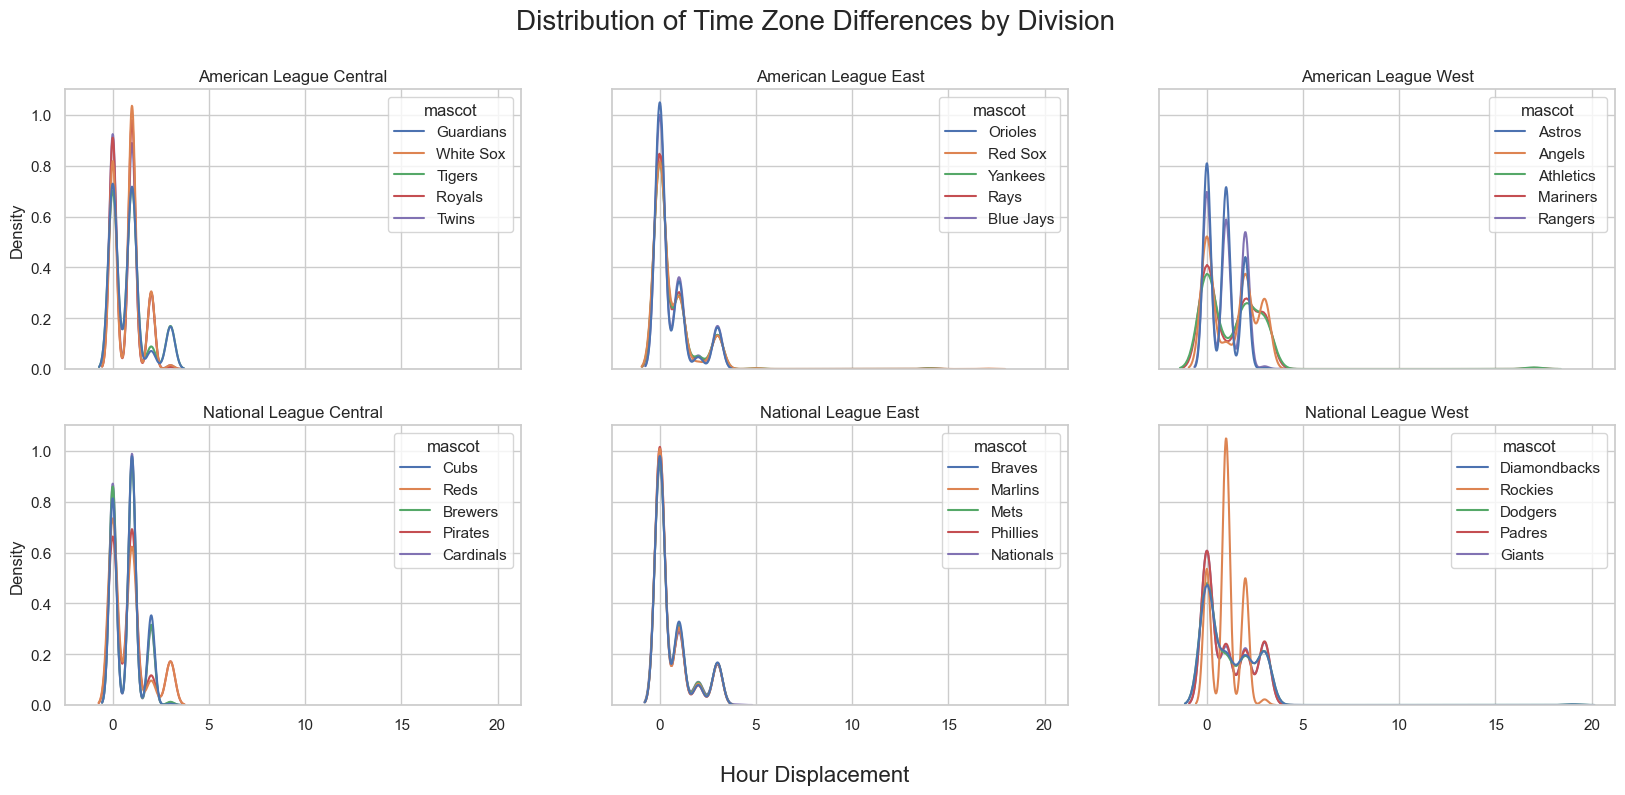

In [203]:
plt.rcParams["figure.figsize"]=20,8
sns.set(style="whitegrid")
fig,axes = plt.subplots(2,3,sharey=True, sharex=True)
axes = axes.flatten()

a=sns.kdeplot(data=new[new['division']=="American League Central"], x="time_zone_dif",
            hue ="mascot", common_norm=False,  ax = axes[0])
a.title.set_text("American League Central")
a.set(xlabel = None)
b=sns.kdeplot(data=new[new['division']=="American League East"], x="time_zone_dif",
            hue ="mascot",  common_norm=False,  ax = axes[1])
b.title.set_text("American League East")
b.set(xlabel = None)
c=sns.kdeplot(data=new[new['division']=="American League West"], x="time_zone_dif",
            hue ="mascot",  common_norm=False,  ax = axes[2])
c.title.set_text("American League West")
c.set(xlabel = None)
d=sns.kdeplot(data=new[new['division']=="National League Central"], x="time_zone_dif",
            hue ="mascot", common_norm=False, ax = axes[3])
d.title.set_text("National League Central")
d.set(xlabel = None)
e=sns.kdeplot(data=new[new['division']=="National League East"], x="time_zone_dif",
            hue ="mascot",  common_norm=False, ax = axes[4])
e.title.set_text("National League East")
e.set(xlabel = None)
f=sns.kdeplot(data=new[new['division']=="National League West"], x="time_zone_dif",
            hue ="mascot",common_norm=False, ax = axes[5])
f.title.set_text("National League West")
f.set(xlabel = None)
fig.supxlabel('Hour Displacement', fontsize=16)
fig.suptitle('Distribution of Time Zone Differences by Division', fontsize=20)
plt.show()

In [78]:
team_list = sorted(dist['home_team'].unique())

In [79]:
team_list

['ATL',
 'AZ',
 'BAL',
 'BOS',
 'CHC',
 'CIN',
 'CLE',
 'COL',
 'CWS',
 'DET',
 'HOU',
 'KC',
 'LAA',
 'LAD',
 'MIA',
 'MIL',
 'MIN',
 'MON',
 'NYM',
 'NYY',
 'OAK',
 'PHI',
 'PIT',
 'SD',
 'SEA',
 'SF',
 'STL',
 'TB',
 'TEX',
 'TOR',
 'WAS']

In [45]:
query ="SELECT*FROM dist WHERE dist.home_team = 'HOU' OR dist.away_team = 'HOU'"
t=sqldf(query)
save_file('/Users/emmagruben/Downloads/Datathon 2024', 'astros', t)

In [40]:
# Create a density plot with Plotly
fig = px.histogram(dist[dist['home_distance_traveled']!=0]['away_distance_travelled_game'], nbins=40, marginal="rug", opacity=0.7)

# Set title
fig.update_layout(title_text="Density Plot")

# Show the plot
fig.show()

In [15]:
query = "SELECT DISTINCT dist.home_distance_travelled_game, dist.home_distance_travelled_game, dist.home_team, dist.away_team, dist.venue_name,dist.year,dist.lat, dist.lng FROM dist"
test = sqldf(query)
test

,away_distance_travelled_game,home_distance_travelled_game,home_team,away_team,venue_name,year,lat,lng
0,5815.094146,2957.191537,TOR,TEX,Estadio Hiram Bithorn,2001,18.467100,-66.118500
1,1396.336454,0.000000,BAL,BOS,Oriole Park at Camden Yards,2001,39.290400,-76.612200
2,494.028306,0.000000,CLE,CWS,Progressive Field,2001,41.499300,-81.694400
3,1143.759125,272.552421,NYY,KC,Yankee Stadium I,2001,40.712800,-74.006000
4,1089.912340,1575.035287,SEA,OAK,Safeco Field,2001,47.606100,-122.332800
...,...,...,...,...,...,...,...,...
28767,0.000000,0.000000,COL,MIN,Coors Field,2023,39.742043,-104.991531
28768,129.615606,0.000000,NYM,PHI,Citi Field,2023,40.712800,-74.006000
28769,0.000000,0.000000,PIT,MIA,PNC Park,2023,40.440600,-79.995900
28770,0.000000,0.000000,CWS,SD,Guaranteed Rate Field;U.S. Cellular Field,2023,41.881832,-87.623177


In [191]:
timeys= pd.read_csv("/Users/emmagruben/Downloads/Datathon 2024/teams_mascots_div_tz - Sheet1.csv")
query = "SELECT timeys.tz, COUNT(timeys.tz) from timeys GROUP BY timeys.tz "
tz_counts = sqldf(query)
tz_counts

,tz,COUNT(timeys.tz)
0,CST,8
1,EST,14
2,MST,2
3,PST,6


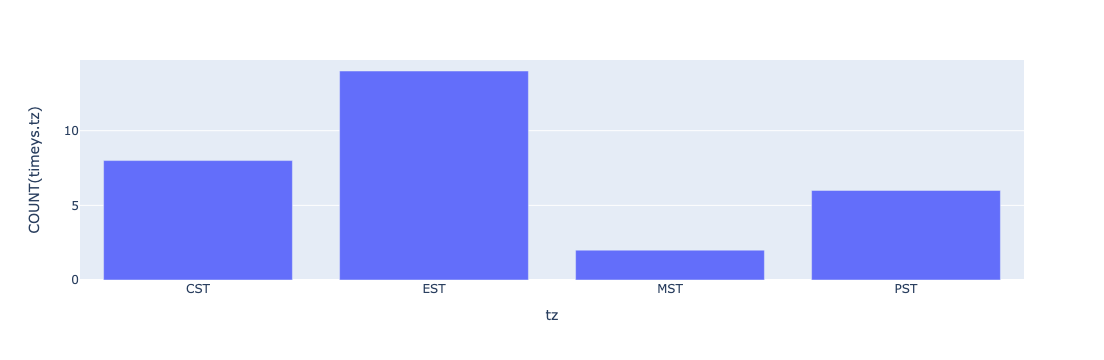

In [188]:
import plotly.express as px
fig = px.bar(tz_counts, x='tz', y='COUNT(timeys.tz)')
fig.show()

In [247]:
full = pd.read_csv("/Users/emmagruben/Downloads/Datathon 2024/datathon2024_FULL.csv")
full['away_win']= [1 if y>x else 0 for x,y in zip(full['home_score'],full['away_score'])]
full_df=full.copy()

In [248]:
def teams_dist_2(team):
    sub = full_df[(full_df['home_team']== team) | (dist['away_team']== team)]
    sub['home_game'] = np.where(sub['home_team'] == team, 1, 0)
    sub['score'] = np.where(sub['home_game'] == 1, sub['home_score'], sub['away_score'])
    sub['last_time_zone'] = np.where(sub['home_game'] == 1, sub['home_last_time_zone'], sub['away_last_time_zone'])
    sub['dist_traveled'] = pd.to_numeric(np.where(sub['home_game'] == 1, sub['home_distance_travelled_game'], sub['away_distance_travelled_game']))
    sub['time_between_games'] = np.where(sub['home_game'] == 1, sub['home_time_between_games'], sub['away_time_between_games'])
    sub['time_zone_team'] = np.where(sub['home_game'] == 1, sub['home_last_time_zone'], sub['away_last_time_zone'])
    sub['win'] = np.where(sub['home_game'] == 1, sub['home_win'],sub['away_win'] )
    sub['team'] = team
    sub['time_zone_dif'] = abs(sub['time_zone_team']-sub['time_zone'])
    sub['win_odds'] = np.where(sub['home_game'] == 1, sub['home_odds'],sub['away_odds'] )
    
    return sub
    

In [249]:
team_list = sorted(full_df['home_team'].unique())
df_list=[]
for team in team_list:
    df_list.append(teams_dist(team))
    
resy = pd.concat(df_list)
resy

/var/folders/54/lw0xxnyj2qsdtxv3kqfz9v980000gn/T/ipykernel_85207/183471276.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/54/lw0xxnyj2qsdtxv3kqfz9v980000gn/T/ipykernel_85207/183471276.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/54/lw0xxnyj2qsdtxv3kqfz9v980000gn/T/ipykernel_85207/183471276.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/54/lw0xxnyj2qsdtxv3kqfz9v980000gn/T/ipykernel_85207/183471276.py:5: SettingWithCopyWar

,Unnamed: 0,index,game_date,home_team,away_team,is_day_game,home_score,away_score,venue,venue_name,...,home_game,score,last_time_zone,dist_traveled,time_between_games,time_zone_team,win,team,time_zone_dif,win_odds
3,3,19436,2008-03-31,ATL,PIT,False,11,12,ATL02,Turner Field,...,1,11,-5.0,872.730455,1.0,-5.0,0,ATL,0.0,0.573575
6,6,19439,2008-03-31,MIA,NYM,True,2,7,MIA01,Sun Life Stadium,...,0,7,-5.0,1757.963653,183.0,-5.0,1,ATL,0.0,0.650532
20,20,19456,2008-04-02,ATL,PIT,False,10,2,ATL02,Turner Field,...,1,10,-5.0,0.000000,2.0,-5.0,1,ATL,0.0,0.528926
55,55,19538,2008-04-08,HOU,STL,False,3,5,HOU03,Minute Maid Park,...,0,5,-6.0,0.000000,1.0,-6.0,1,ATL,0.0,0.493766
70,70,19553,2008-04-09,PIT,CHC,False,4,6,PIT08,PNC Park,...,0,6,-6.0,0.000000,2.0,-6.0,1,ATL,1.0,0.537185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30427,30427,56675,2023-09-24,WAS,ATL,False,5,8,WAS11,Nationals Park,...,1,5,-5.0,0.000000,0.0,-5.0,0,WAS,0.0,0.278607
30474,30474,56724,2023-09-28,BAL,BOS,False,2,0,BAL12,Oriole Park at Camden Yards,...,0,0,-5.0,578.639735,1.0,-5.0,0,WAS,0.0,0.474272
30488,30488,56738,2023-09-29,BAL,BOS,False,0,3,BAL12,Oriole Park at Camden Yards,...,0,3,-5.0,0.000000,1.0,-5.0,1,WAS,0.0,0.526678
30503,30503,56753,2023-09-30,LAA,OAK,False,3,7,ANA01,Angel Stadium of Anaheim,...,0,7,-6.0,0.000000,1.0,-6.0,1,WAS,2.0,0.477693


In [252]:
full.columns

Index(['Unnamed: 0', 'index', 'game_date', 'home_team', 'away_team',
       'is_day_game', 'home_score', 'away_score', 'venue', 'venue_name',
       'city', 'state', 'away_pa', 'away_1b', 'away_2b', 'away_3b', 'away_hr',
       'away_fo', 'away_so', 'away_bb', 'away_hbp', 'home_pa', 'home_1b',
       'home_2b', 'home_3b', 'home_hr', 'home_fo', 'home_so', 'home_bb',
       'home_hbp', 'lat', 'lng', 'time_zone', 'year', 'home_win',
       'home_last_time_zone', 'away_last_time_zone', 'home_time_between_games',
       'away_time_between_games', 'home_time_since_last_series',
       'away_time_since_last_series', 'home_distance_travelled_game',
       'away_distance_travelled_game', 'home_distance_travelled_series',
       'away_distance_travelled_series', 'home_odds', 'away_odds', 'away_win'],
      dtype='object')

In [263]:
from sklearn.linear_model import LinearRegression

In [285]:
reg = LinearRegression()
X = df[[x_vars]]
y = df[yvar]
reg.fit(X, y)
print(reg.coef_)
y_pred = reg.predict(X)
mae = abs(y-y_pred)/len(y)
print(mae)

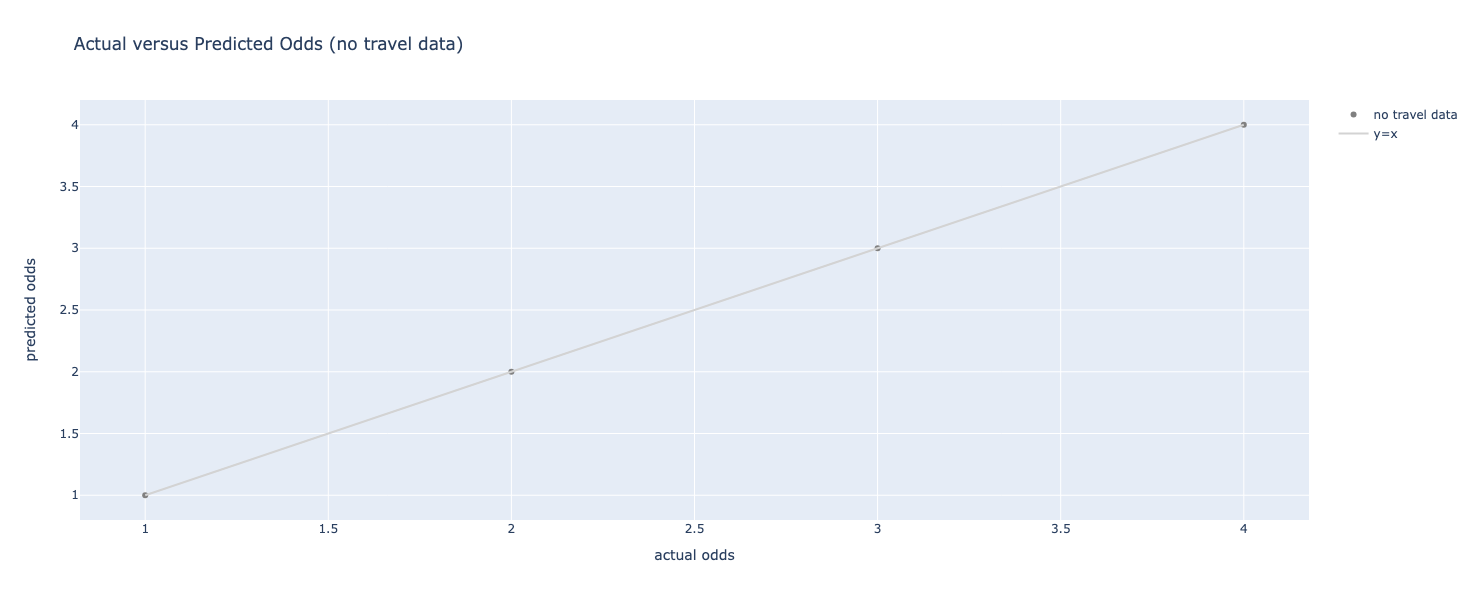

In [282]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=y, y=y_pred, mode='markers',name = "no travel data", marker = dict(color = 'grey')))
fig.update_layout(
    xaxis_title='actual odds',
    yaxis_title='predicted odds',
    title='Actual versus Predicted Odds (no travel data)'
)
fig.add_trace(go.Scatter(x=[min(y), max(y)], y=[min(y), max(y)],
                         mode='lines', name='y=x', marker = dict(color="lightgrey")))
fig.update_layout(width=800, height=600) 
fig.show()

In [ ]:
def mixed_model_mlr(df, x1,x2,x3,x4, y, num_regressors, outliers):
    initial_samp = df.shape[0]
    if outliers == "remove":
        df = helper_func(df,x1,x2,x3,x4,y, num_regressors)
        
    new_samp = df.shape[0]
    if num_regressors ==0:
        formula = f"{y}~C(uid)"
    if num_regressors == 1:
        formula = f"{y}~{x1} + C(uid)"
    if num_regressors == 2:
        formula = f"{y}~{x1} + {x2} + C(uid)"
    if num_regressors == 3:
        formula = f"{y}~{x1} + {x2} + {x3} + C(uid)"
    if num_regressors == 4: 
        formula = f"{y}~{x1} + {x2} + {x3} + {x4} +C(uid)"
        
    model = smf.mixedlm(formula, df, groups = "uid").fit()

    # Calculate R-squared
    y_pred = model.predict(df)
    ss_total = ((df[y] - df[y].mean())**2).sum()
    ss_residual = ((df[y] - y_pred)**2).sum()
    res_sum = (df[y] - y_pred).sum()
    r_squared = 1 - ss_residual / ss_total
    num_observations = df.shape[0]
    mae = (1/num_observations)* abs(df[y] - y_pred).sum()
    rmse = math.sqrt((1/num_observations)*ss_residual)

    adj_r_squared = 1 - ((ss_residual/(num_observations - num_regressors)) / (ss_total/(num_observations -1)))
    p_values = model.pvalues.tail(num_regressors +1 ).iloc[0:num_regressors]
    parameter_estimates = model.params.tail(num_regressors + 1).iloc[0:num_regressors]
    confidence_intervals = model.conf_int().tail(num_regressors +1).iloc[0:num_regressors]
    if num_regressors ==0:
        print(f'response: {y}, R^2_adj = {adj_r_squared}, SS_RES = {ss_residual}, MAE = {mae}, RMSQERROR = {rmse}')
    else:
        results_df = pd.DataFrame({
        "Response" : y,
        "Regressor": parameter_estimates.index,
        "Slope": parameter_estimates.values,
        "Lower CI": confidence_intervals.iloc[:, 0].values,
        "Upper CI": confidence_intervals.iloc[:, 1].values,
        "p-value": p_values.values,
        "R_squared_adj": adj_r_squared,
        "model" : formula,
        "outliers?": outliers,
        "sample_size" : initial_samp,
        "n" : new_samp,
        "SS_RES": ss_residual,
        "sum_of_res":res_sum,
        "mean_absolute_error": mae,
        "root_mean_sq_error": rmse})
        return results_df